<a href="https://colab.research.google.com/github/thanhvietnguyen/Titanic-ML-project/blob/master/src/training_evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Training

In [11]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import joblib

In [12]:
# Đọc và chuẩn bị dữ liệu
df = pd.read_csv("https://raw.githubusercontent.com/thanhvietnguyen/Titanic-ML-project/refs/heads/master/data/train.csv")
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])  #Loại 4 biến không liên quan

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  #New fearture: Gộp số người thân đi cùng + bản thân

X = df.drop(columns=["Survived"]) #Loại bỏ Label khỏi ma trận X
y = df["Survived"]                #Gán label cho ma trận y

In [13]:
# Xây lại preprocessor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

numeric_features = ["Age", "Fare", "FamilySize"]
categorical_features = ["Sex", "Embarked", "Pclass"]

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])


In [14]:
# Chia tập train/test 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train Logistic Regression
from sklearn.pipeline import make_pipeline

logreg_model = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
logreg_model.fit(X_train, y_train)
y_pred_lr = logreg_model.predict(X_test)

In [16]:
# Train Random Forest
rf_model = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model

In [17]:
# Đánh giá 2 mô hình
def evaluate_model(name, y_true, y_pred):
    print(f"Đánh giá mô hình: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("-" * 50)

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)

Đánh giá mô hình: Logistic Regression
Accuracy: 0.7988826815642458
Precision: 0.7794117647058824
Recall: 0.7162162162162162
F1 Score: 0.7464788732394366
Confusion Matrix:
 [[90 15]
 [21 53]]
--------------------------------------------------
Đánh giá mô hình: Random Forest
Accuracy: 0.8100558659217877
Precision: 0.7777777777777778
Recall: 0.7567567567567568
F1 Score: 0.7671232876712328
Confusion Matrix:
 [[89 16]
 [18 56]]
--------------------------------------------------


# Evaluation Charts

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [19]:
def plot_confusion(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [22]:
# Dự đoán xác suất
y_proba_lr = logreg_model.predict_proba(X_test)[:, 1]
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

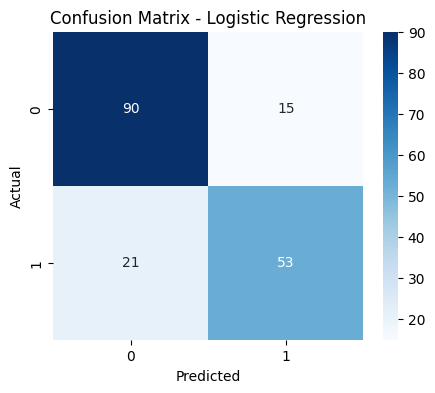

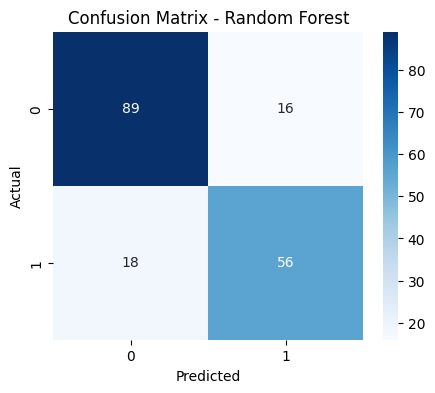

In [24]:
# Confusion Matrix
plot_confusion(y_test, y_pred_lr, "Confusion Matrix - Logistic Regression")
plot_confusion(y_test, y_pred_rf, "Confusion Matrix - Random Forest")

In [25]:
# Lưu mô hình tốt nhất
joblib.dump(rf_model, "best_model.pkl")
print("Đã lưu mô hình tốt nhất vào best_model.pkl")

Đã lưu mô hình tốt nhất vào best_model.pkl


In [ ]:
# Check version Scikit-learn để phục vụ cho việc deloy API model lên Render
pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR